In [1]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import imblearn
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../Data/Processed_data/ICGC-JP-HCC_labelled_matched_with_hccdb30.tsv', sep='\t')
data

,SampleID,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A2MP1,A4GALT,A4GNT,AAAS,...,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,TYPE
0,HCCDB-18.S1,7.02,4.98,3.79,9.92,0.27,0.35,1.88,1.52,4.85,...,3.00,0.24,1.36,3.07,0.00,1.89,6.28,1.76,2.27,HCC
1,HCCDB-18.S2,9.41,7.04,4.42,8.54,0.20,0.25,0.33,0.04,3.54,...,0.71,0.58,3.07,3.05,0.37,1.73,4.79,1.45,1.93,Adjacent
2,HCCDB-18.S3,9.08,7.33,4.74,8.83,0.03,0.35,0.72,0.00,3.71,...,1.42,0.77,2.62,2.61,0.03,1.96,4.22,2.15,2.41,HCC
3,HCCDB-18.S4,8.40,6.19,3.78,7.57,0.42,1.04,1.67,0.32,4.11,...,1.62,0.79,1.92,2.56,0.29,2.13,5.67,2.48,2.85,Adjacent
4,HCCDB-18.S5,7.96,5.98,5.52,8.11,0.12,0.34,0.48,0.00,4.18,...,1.49,1.03,2.57,2.85,1.31,2.75,4.24,2.34,2.64,HCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,HCCDB-18.S385,9.47,7.28,5.05,9.85,0.12,0.42,0.88,0.20,3.95,...,1.54,0.64,1.86,2.61,0.47,2.44,5.26,4.09,2.66,Adjacent
385,HCCDB-18.S386,6.40,4.65,3.95,6.17,0.00,0.38,0.64,0.08,4.36,...,2.63,0.95,4.29,2.48,1.82,3.58,3.62,1.56,2.17,HCC
386,HCCDB-18.S387,8.82,6.91,4.89,9.58,0.03,0.45,0.61,0.07,3.30,...,0.81,0.36,2.04,3.39,0.45,2.58,4.13,2.21,2.66,Adjacent
387,HCCDB-18.S388,8.13,5.72,4.04,6.55,0.00,0.23,1.47,0.00,4.84,...,2.52,0.28,1.33,3.24,1.45,2.00,5.35,2.28,2.24,HCC


In [4]:
# Separate features and labels
X = data.iloc[:, 1:-1]
y = data['TYPE']

In [5]:
# log2 transformation
X_log2 = np.log2(X + 0.001)
X_log2

,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A2MP1,A4GALT,A4GNT,AAAS,AACS,...,ZW10,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,2.811677,2.316435,1.922578,3.310486,-1.883635,-1.510457,0.911500,0.605020,2.278282,1.299245,...,1.526570,1.585443,-2.052895,0.444667,1.618709,-9.965784,0.919149,2.650994,0.816395,1.183328
1,3.234348,2.815780,2.144373,3.094405,-2.314733,-1.994241,-1.595097,-4.608232,1.824157,0.240009,...,0.848798,-0.492079,-0.783390,1.618709,1.609282,-1.430509,0.791606,2.260327,0.537048,0.949348
2,3.182851,2.874010,2.245191,3.142577,-5.011588,-1.510457,-0.471929,-9.965784,1.891808,0.345964,...,1.541515,0.506907,-0.375197,1.390117,1.384602,-5.011588,0.971590,2.077585,1.105008,1.269632
3,3.070561,2.630172,1.918768,2.920484,-1.248108,0.057970,0.740712,-1.639355,2.039489,0.227741,...,1.275603,0.696884,-0.338250,0.941858,1.356707,-1.780909,1.091531,2.503603,1.310922,1.511468
4,2.992950,2.580387,2.464930,3.019880,-3.046921,-1.552156,-1.055891,-9.965784,2.063848,0.791606,...,1.239398,0.576280,0.044044,1.362330,1.511468,0.390668,1.459956,2.084404,1.227125,1.401084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,3.243517,2.864137,2.336569,3.300270,-3.046921,-1.248108,-0.182786,-2.314733,1.982218,0.151859,...,1.183328,0.623867,-0.641604,0.896078,1.384602,-1.086201,1.287472,2.395337,2.032454,1.411969
385,2.678297,2.217541,1.982218,2.625504,-9.965784,-1.392137,-0.641604,-3.625934,2.124659,0.978928,...,1.239398,1.395611,-0.072483,2.101314,1.310922,0.864731,1.840363,1.856388,0.642471,1.118360
386,3.140942,2.788894,2.290129,3.260176,-5.011588,-1.148801,-0.710756,-3.816037,1.722903,0.379621,...,1.328262,-0.302226,-1.469929,1.029276,1.761711,-1.148801,1.367930,2.046491,1.144699,1.411969
387,3.023433,2.516267,2.014712,2.711715,-9.965784,-2.114035,0.556797,-9.965784,2.275305,1.687509,...,1.401084,1.333996,-1.831358,0.412511,1.696439,0.537048,1.000721,2.419809,1.189666,1.164143


In [6]:
# Verify transformation
print(f" Original range: {X.min().min()} to {X.max().max()}")
print(f" Log2 range: {X_log2.min().min()} to {X_log2.max().max()}")

 Original range: 0.0 to 16.61
 Log2 range: -9.965784284662087 to 4.054067022589465


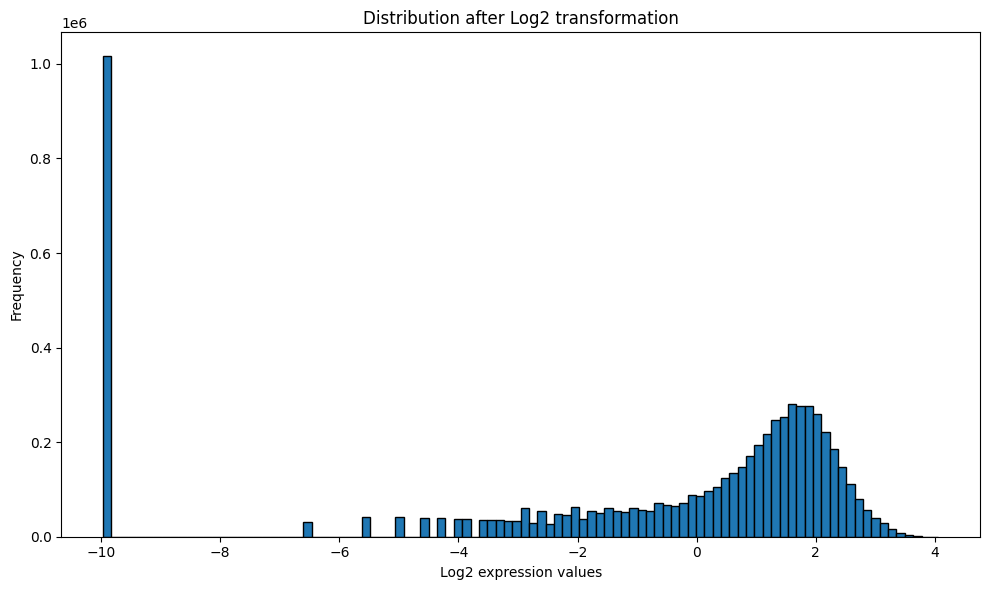

In [7]:
# Plot histogram after transformation
plt.figure(figsize=(10, 6))
plt.hist(X_log2.values.flatten(), bins=100, edgecolor='black')
plt.xlabel('Log2 expression values')
plt.ylabel('Frequency')
plt.title('Distribution after Log2 transformation')
plt.tight_layout()
plt.savefig("../Results/ML_results/distribution_after_log2_transformation_icgc.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

y_raw = y.copy()
le = LabelEncoder()
y_enc = le.fit_transform(y_raw)

In [9]:
from sklearn.model_selection import train_test_split

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(
    X_log2, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining class distribution:\n{np.bincount(y_train)}")
print(f"\nTest class distribution:\n{np.bincount(y_test)}")

Training set: (311, 16447)
Test set: (78, 16447)

Training class distribution:
[142 169]

Test class distribution:
[35 43]


In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Same scaler, only transform

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

Training data shape: (311, 16447)
Test data shape: (78, 16447)


In [11]:
X_train_scaled.min().min(), X_train_scaled.max().max()

(np.float64(-15.892869268716913), np.float64(17.60681686165902))

In [12]:
from sklearn.linear_model import LogisticRegressionCV

# LASSO feature selection (classification-correct)
lasso = LogisticRegressionCV(
    penalty="l1",
    solver="saga",
    cv=10,
    scoring="roc_auc",
    max_iter=5000,
    n_jobs=-1,
    random_state=42
)

lasso.fit(X_train_scaled, y_train)

selected_features = lasso.coef_[0] != 0
n_selected = np.sum(selected_features)
print(f"\nLASSO Feature Selection (10-fold CV):")
print(f"Original features: {X_train_scaled.shape[1]}")
print(f"Selected features: {n_selected}")
print(f"Removed: {X_train_scaled.shape[1] - n_selected} genes")

# Apply feature selection
X_train_lasso = X_train_scaled[:, selected_features]
X_test_lasso = X_test_scaled[:, selected_features]

print(f"Training shape after LASSO: {X_train_lasso.shape}")
print(f"Test shape after LASSO: {X_test_lasso.shape}")


LASSO Feature Selection (10-fold CV):
Original features: 16447
Selected features: 45
Removed: 16402 genes
Training shape after LASSO: (311, 45)
Test shape after LASSO: (78, 45)


In [13]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_lasso, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_balanced))

Before SMOTE: [142 169]
After SMOTE: [169 169]


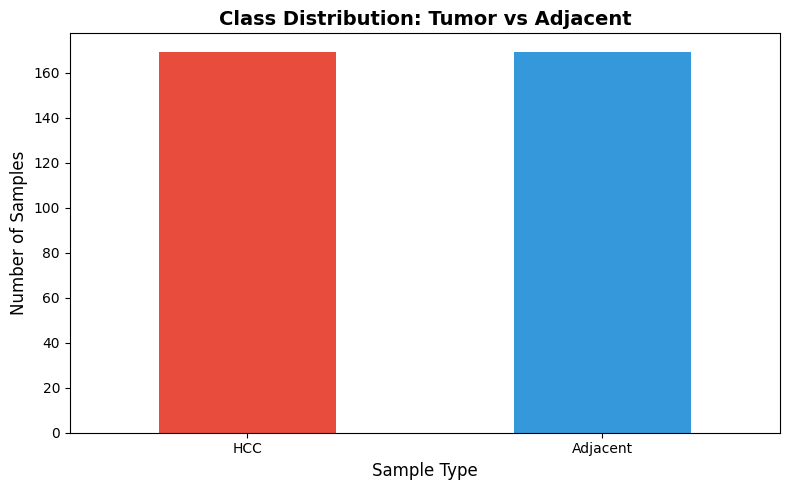


Class distribution (%):
Sample Type
HCC         50.0
Adjacent    50.0
Name: proportion, dtype: float64


In [14]:
# After SMOTE Visualize class distribution
# Convert to Series with class names
y_series = pd.Series(
    le.inverse_transform(y_train_balanced),
    name="Sample Type"
)
class_counts = y_series.value_counts()
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['#e74c3c', '#3498db'])
plt.title('Class Distribution: Tumor vs Adjacent', fontsize=14, fontweight='bold')
plt.xlabel('Sample Type', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("../Results/ML_results/class_distribution_icgc.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()
# Calculate percentages
class_percentages = y_series.value_counts(normalize=True) * 100
print("\nClass distribution (%):")
print(class_percentages.round(2))

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest with GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.979367866549605


In [16]:
# Get best model and predict
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_lasso)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.987

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.98      0.99        43

    accuracy                           0.99        78
   macro avg       0.99      0.99      0.99        78
weighted avg       0.99      0.99      0.99        78



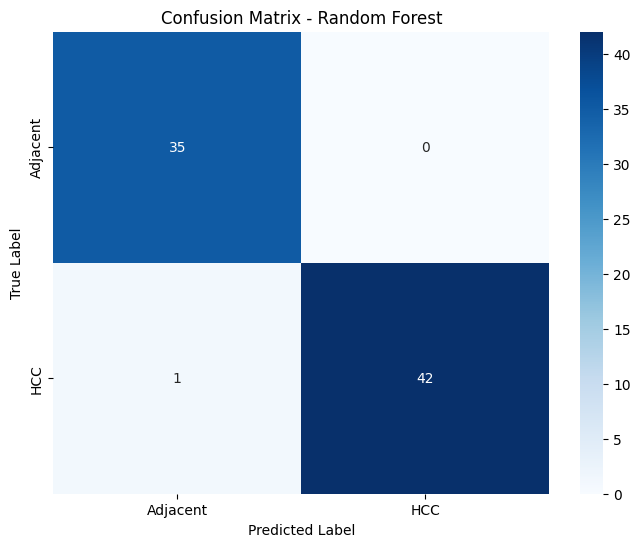

In [17]:
import seaborn as sns

# Plot confusion matrix with seaborn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Adjacent', 'HCC'], 
            yticklabels=['Adjacent', 'HCC'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Random Forest')
plt.savefig("../Results/ML_results/rf_confustion_matrix_icgc.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

In [18]:
X_train_lasso.min().min(), X_train_lasso.max().max()

(np.float64(-8.392062319213677), np.float64(3.280679672076494))

In [19]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on best model
cv_scores = cross_val_score(best_rf, X_train_balanced, y_train_balanced, 
                            cv=5, scoring='accuracy')

print("Cross-Validation Results:")
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")
# Compare CV performance vs Test performance
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.3f}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Results:
CV Scores: [0.98529412 0.94117647 0.98529412 1.         0.98507463]
Mean CV Accuracy: 0.979 (+/- 0.020)

Cross-Validation Accuracy: 0.979
Test Set Accuracy: 0.987


ROC-AUC Score: 0.978


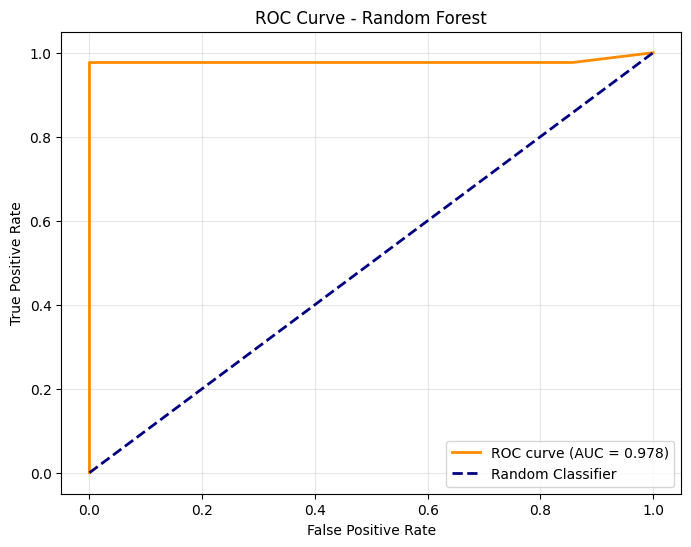

In [20]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get probability predictions for ROC curve
y_pred_proba = best_rf.predict_proba(X_test_lasso)[:, 1]  # Probability for HCC class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC Score: {roc_auc:.3f}")
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig("../Results/ML_results/rf_auc_icgc.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

In [21]:
from sklearn.svm import SVC

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['rbf', 'linear']
}

# SVM with GridSearchCV
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_balanced, y_train_balanced)

print("Best SVM parameters:", grid_svm.best_params_)
print("Best CV score:", grid_svm.best_score_)

Best SVM parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 0.9852941176470589


In [22]:
# Predictions
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_lasso)
y_pred_proba_svm = best_svm.predict_proba(X_test_lasso)[:, 1]

# Evaluation
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Test Accuracy: 0.974

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.95      0.98        43

    accuracy                           0.97        78
   macro avg       0.97      0.98      0.97        78
weighted avg       0.98      0.97      0.97        78



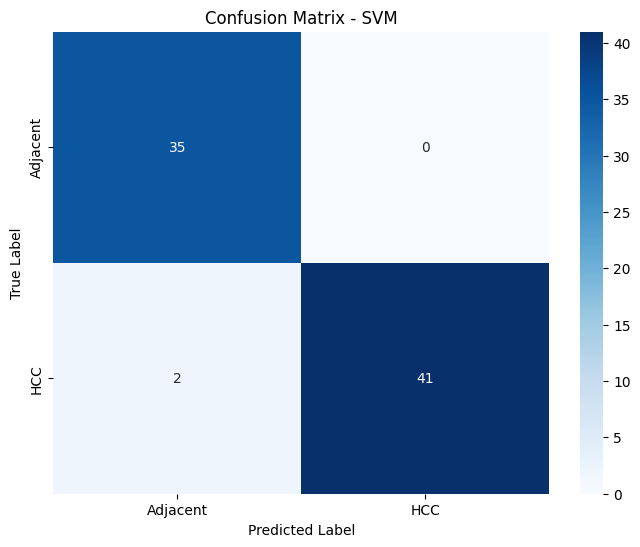

In [23]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adjacent', 'HCC'],
            yticklabels=['Adjacent', 'HCC'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - SVM')
plt.savefig("../Results/ML_results/svm_confustion_matrix_icgc.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

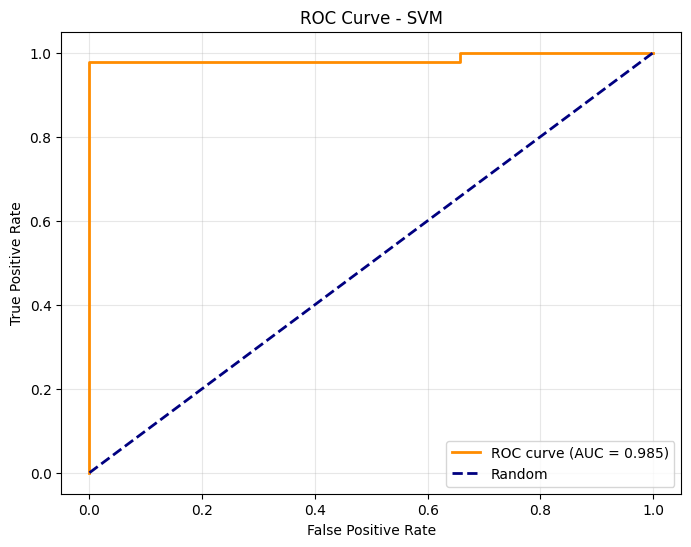

In [24]:
# ROC-AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm, pos_label=1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig("../Results/ML_results/svm_auc_icgc.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression

# Parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Logistic Regression with GridSearchCV
lr = LogisticRegression(random_state=42, max_iter=1000)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_balanced, y_train_balanced)

print("Best LR parameters:", grid_lr.best_params_)
print("Best CV score:", grid_lr.best_score_)

/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:34

Best LR parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV score: 0.9763827919227394


/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:34

In [26]:
# Predictions
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_lasso)
y_pred_proba_lr = best_lr.predict_proba(X_test_lasso)[:, 1]

# Evaluation
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Test Accuracy: 0.974

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.95      0.98        43

    accuracy                           0.97        78
   macro avg       0.97      0.98      0.97        78
weighted avg       0.98      0.97      0.97        78



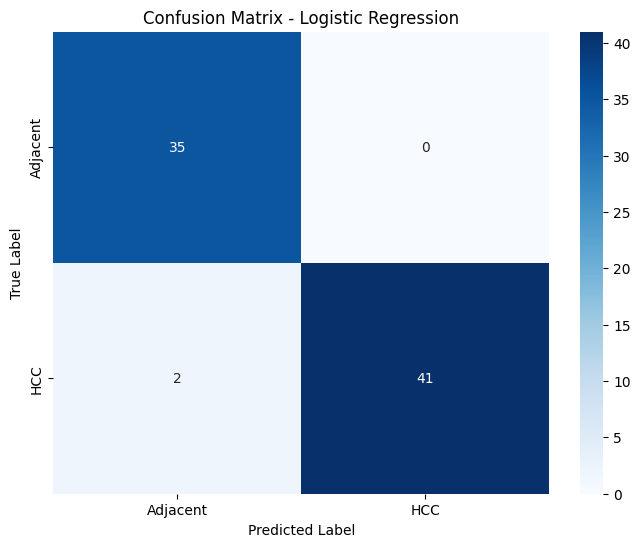

In [27]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adjacent', 'HCC'],
            yticklabels=['Adjacent', 'HCC'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig("../Results/ML_results/lr_confustion_matrix_icgc.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

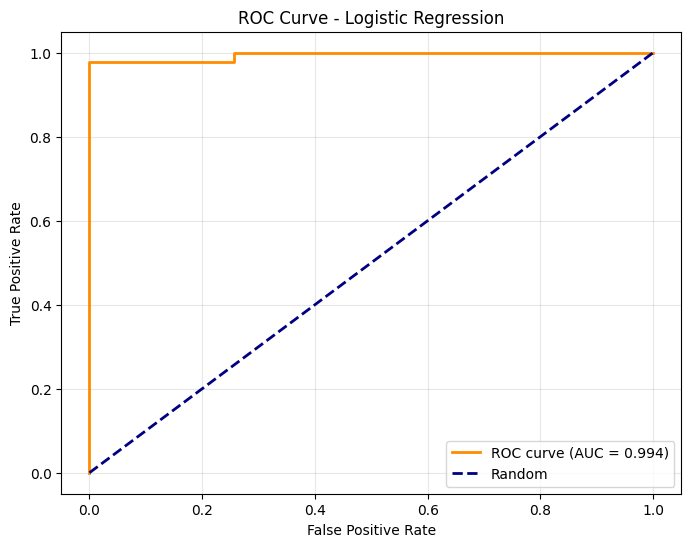

In [28]:
# ROC-AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr, pos_label=1)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig("../Results/ML_results/lr_auc_icgc.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

In [29]:
from xgboost import XGBClassifier

# Parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

# XGBoost with GridSearchCV
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train_balanced, y_train_balanced)

print("Best XGBoost parameters:", grid_xgb.best_params_)
print("Best CV score:", grid_xgb.best_score_)

Best XGBoost parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best CV score: 0.979367866549605


In [30]:
# Predictions
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_lasso)
y_pred_proba_xgb = best_xgb.predict_proba(X_test_lasso)[:, 1]

# Evaluation
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Test Accuracy: 0.987

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.98      0.99        43

    accuracy                           0.99        78
   macro avg       0.99      0.99      0.99        78
weighted avg       0.99      0.99      0.99        78



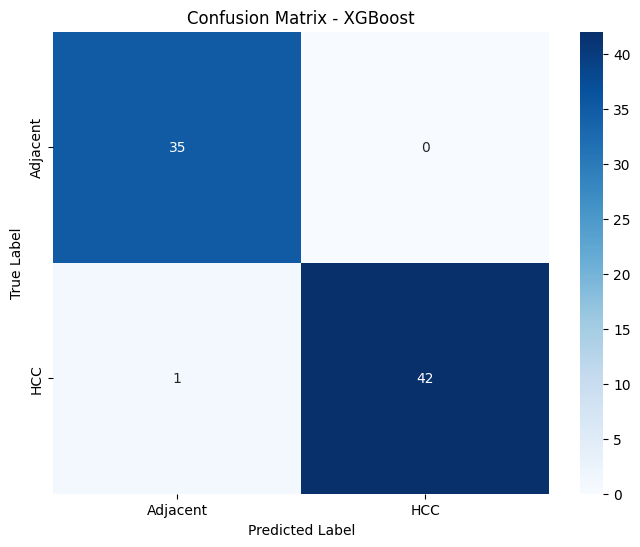

In [31]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adjacent', 'HCC'],
            yticklabels=['Adjacent', 'HCC'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - XGBoost')
plt.savefig("../Results/ML_results/xgb_confustion_matrix_icgc.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

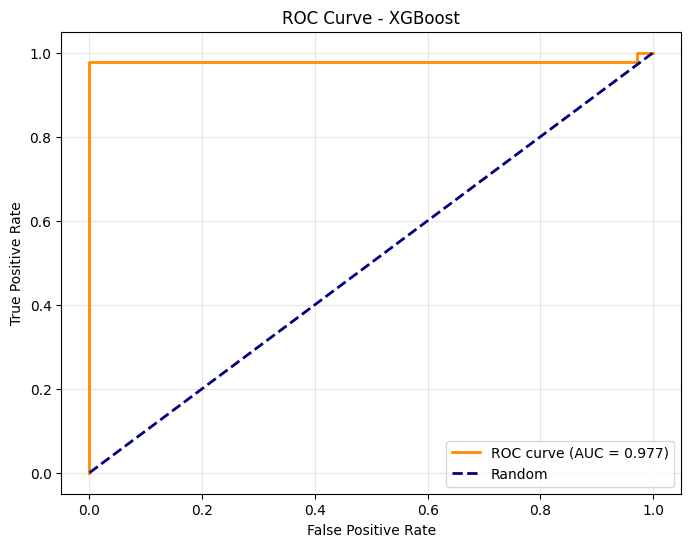

In [32]:
# ROC-AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb, pos_label=1)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig("../Results/ML_results/xgb_auc_icgc.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

In [33]:
 # Load external validation dataset
external_data = pd.read_csv('../Data/Processed_data/external_val_HCCDB30_processed_matched.tsv', sep = '\t')  

print(f"External dataset shape: {external_data.shape}")
print(external_data['TYPE'].value_counts())

External dataset shape: (101, 16449)
TYPE
HCC         54
Adjacent    47
Name: count, dtype: int64


In [34]:
# Separate features and labels
X_external = external_data.iloc[:, 1:-1]
y_external = external_data['TYPE']

print(f"External samples: {X_external.shape[0]}")
print(f"External genes: {X_external.shape[1]}")

External samples: 101
External genes: 16447


In [35]:
y_external_raw = y_external.copy()
y_external_enc = le.transform(y_external_raw)

In [36]:
# Check the actual issue
print(f"Original y_external shape: {y_external.shape}")
print(f"Unique classes in y_external: {y_external.unique()}")
print(f"Classes the encoder knows: {le.classes_}")

Original y_external shape: (101,)
Unique classes in y_external: ['HCC' 'Adjacent']
Classes the encoder knows: ['Adjacent' 'HCC']


In [37]:
# Log2 transform (has ALL genes)
X_external_log2 = np.log2(X_external + 0.001)

# Get ALL training genes (before LASSO)
all_training_genes = X_train.columns

# Keep only common genes (same as training before LASSO)
common_genes_all = X_external_log2.columns.intersection(all_training_genes)
X_external_aligned = X_external_log2[common_genes_all]

print(f"All training genes: {len(all_training_genes)}")
print(f"External genes overlap: {len(common_genes_all)}")

# Scale (with ALL genes like training)
X_external_scaled = scaler.transform(X_external_aligned)

# Apply LASSO selection (select same genes)
selected_gene_names = X_train.columns[selected_features]
selected_indices = [list(common_genes_all).index(gene) for gene in selected_gene_names if gene in common_genes_all]
X_external_filtered = X_external_scaled[:, selected_indices]

print(f"After LASSO selection: {X_external_filtered.shape}")
print(f"Mean: {X_external_filtered.mean():.3f}, Std: {X_external_filtered.std():.3f}")

All training genes: 16447
External genes overlap: 16447
After LASSO selection: (101, 45)
Mean: -0.708, Std: 1.507


In [38]:
X_external_filtered.min().min(), X_external_filtered.max().max()

(np.float64(-6.663744549583054), np.float64(3.246255873909843))

In [39]:
X_external_log2.min().min(), X_external_log2.max().max()

(np.float64(-9.965784284662087), np.float64(3.9430667986442374))

In [40]:
X_external_scaled.min().min(), X_external_scaled.max().max()

(np.float64(-126.13431740346358), np.float64(56.62111049299203))

In [41]:
# Predict
y_external_pred = best_rf.predict(X_external_filtered)

print("\nExternal Validation Results:")
print(f"Accuracy: {accuracy_score(y_external_enc, y_external_pred):.3f}")
print(classification_report(y_external_enc, y_external_pred))


External Validation Results:
Accuracy: 0.861
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        47
           1       0.87      0.87      0.87        54

    accuracy                           0.86       101
   macro avg       0.86      0.86      0.86       101
weighted avg       0.86      0.86      0.86       101



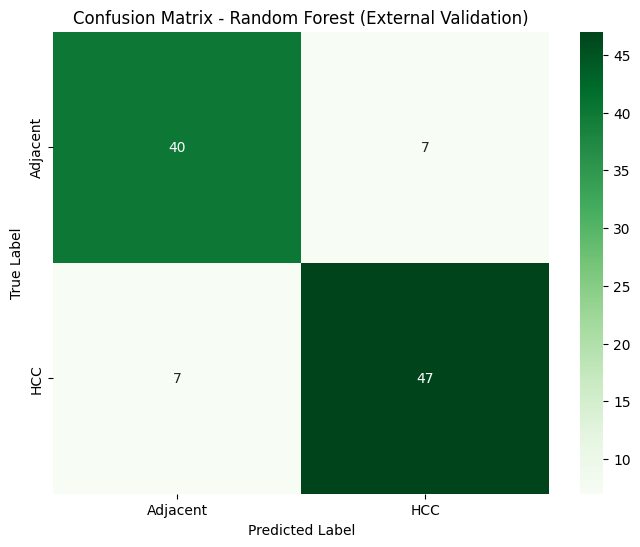

In [42]:
# Confusion Matrix
cm_rf = confusion_matrix(y_external_enc, y_external_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Adjacent', 'HCC'],
            yticklabels=['Adjacent', 'HCC'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Random Forest (External Validation)')
plt.savefig("../Results/ML_results/rf_confustion_matrix_validation.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

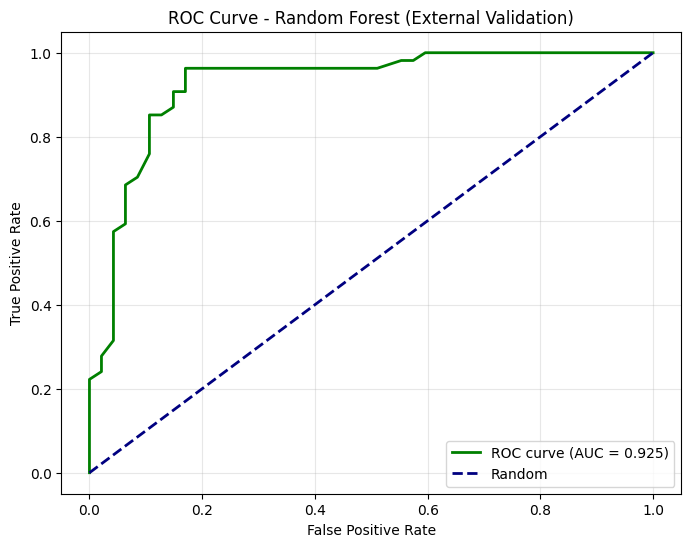

In [43]:
# Get prediction probabilities for the positive class
y_external_pred_proba = best_rf.predict_proba(X_external_filtered)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_external_enc, y_external_pred_proba, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (External Validation)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig("../Results/ML_results/rf_auc_validation.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

In [44]:
# Predict
y_external_pred = best_svm.predict(X_external_filtered)

print("\nExternal Validation Results:")
print(f"Accuracy: {accuracy_score(y_external_enc, y_external_pred):.3f}")
print(classification_report(y_external_enc, y_external_pred))


External Validation Results:
Accuracy: 0.842
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        47
           1       0.90      0.80      0.84        54

    accuracy                           0.84       101
   macro avg       0.84      0.84      0.84       101
weighted avg       0.85      0.84      0.84       101



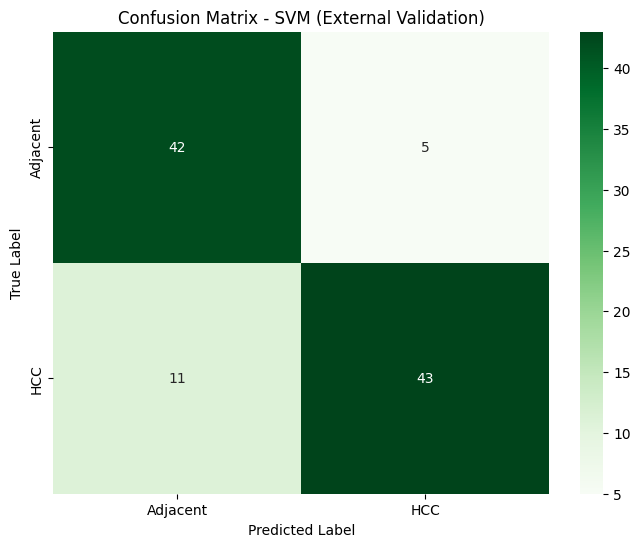

In [45]:
# SVM Predictions
y_external_pred_svm = best_svm.predict(X_external_filtered)
y_external_pred_proba_svm = best_svm.decision_function(X_external_filtered)  # SVM uses decision_function

# Confusion Matrix - SVM
cm_svm = confusion_matrix(y_external_enc, y_external_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Adjacent', 'HCC'],
            yticklabels=['Adjacent', 'HCC'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - SVM (External Validation)')
plt.savefig("../Results/ML_results/svm_confustion_matrix_validation.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

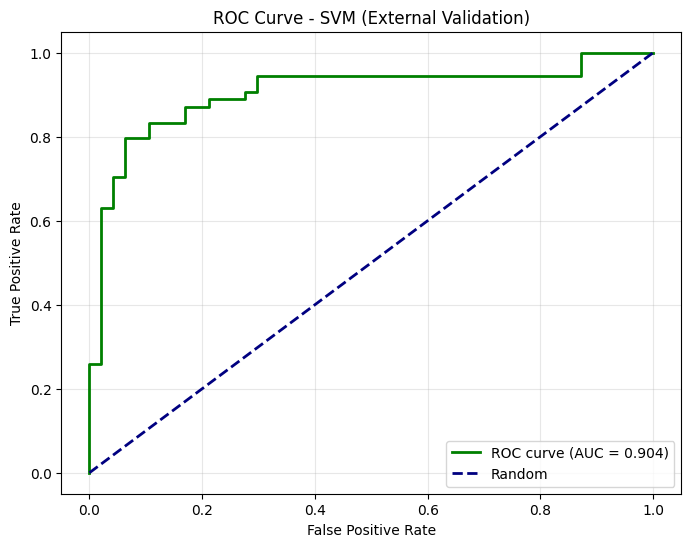

In [46]:
# ROC Curve - SVM
fpr_svm, tpr_svm, _ = roc_curve(y_external_enc, y_external_pred_proba_svm, pos_label=1)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (External Validation)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig("../Results/ML_results/svm_auc_validation.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

In [47]:
# Predict
y_external_pred = best_lr.predict(X_external_filtered)

print("\nExternal Validation Results:")
print(f"Accuracy: {accuracy_score(y_external_enc, y_external_pred):.3f}")
print(classification_report(y_external_enc, y_external_pred))


External Validation Results:
Accuracy: 0.733
              precision    recall  f1-score   support

           0       0.65      0.94      0.77        47
           1       0.91      0.56      0.69        54

    accuracy                           0.73       101
   macro avg       0.78      0.75      0.73       101
weighted avg       0.79      0.73      0.72       101



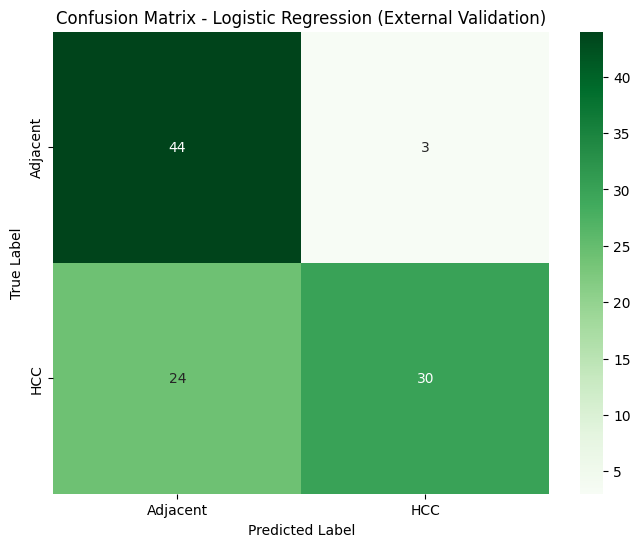

In [48]:
# Logistic Regression Predictions
y_external_pred_lr = best_lr.predict(X_external_filtered)
y_external_pred_proba_lr = best_lr.predict_proba(X_external_filtered)[:, 1]

# Confusion Matrix - Logistic Regression
cm_lr = confusion_matrix(y_external_enc, y_external_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Adjacent', 'HCC'],
            yticklabels=['Adjacent', 'HCC'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Logistic Regression (External Validation)')
plt.savefig("../Results/ML_results/lr_confustion_matrix_validation.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

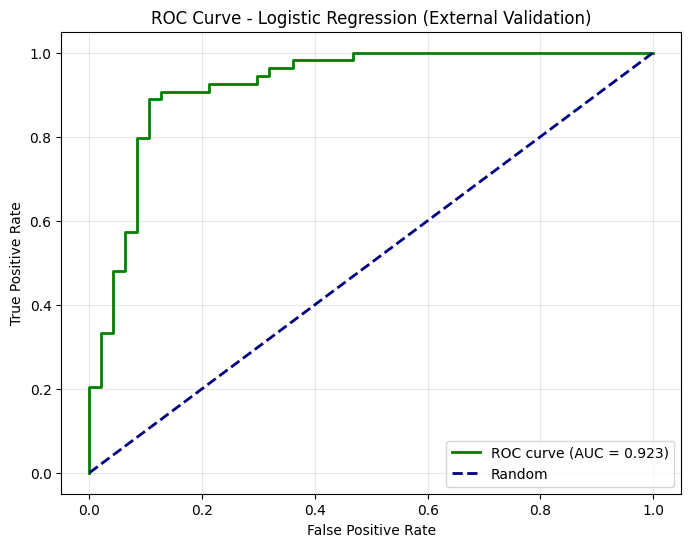

In [49]:

# ROC Curve - Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_external_enc, y_external_pred_proba_lr, pos_label=1)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_lr:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (External Validation)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig("../Results/ML_results/lr_auc_validation.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

In [50]:
# Predict
y_external_pred = best_xgb.predict(X_external_filtered)

print("\nExternal Validation Results:")
print(f"Accuracy: {accuracy_score(y_external_enc, y_external_pred):.3f}")
print(classification_report(y_external_enc, y_external_pred))


External Validation Results:
Accuracy: 0.871
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.89      0.87      0.88        54

    accuracy                           0.87       101
   macro avg       0.87      0.87      0.87       101
weighted avg       0.87      0.87      0.87       101



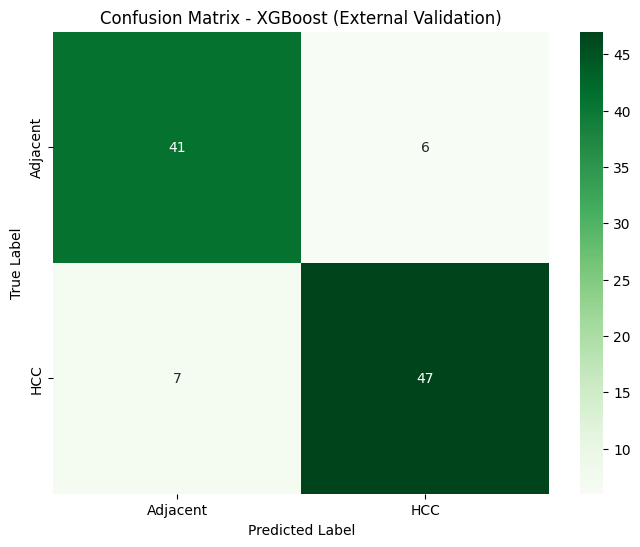

In [51]:
# XGBoost Predictions
y_external_pred_xgb = best_xgb.predict(X_external_filtered)
y_external_pred_proba_xgb = best_xgb.predict_proba(X_external_filtered)[:, 1]

# Confusion Matrix - XGBoost
cm_xgb = confusion_matrix(y_external_enc, y_external_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Adjacent', 'HCC'],
            yticklabels=['Adjacent', 'HCC'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - XGBoost (External Validation)')
plt.savefig("../Results/ML_results/xgb_confustion_matrix_validation.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

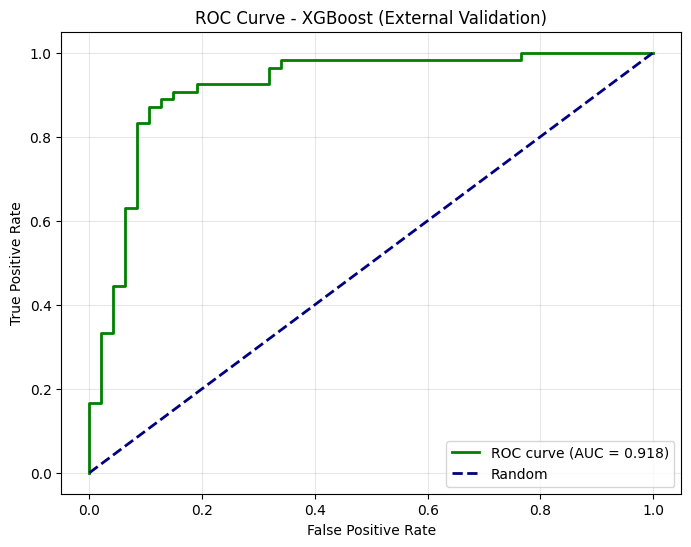

In [52]:

# ROC Curve - XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_external_enc, y_external_pred_proba_xgb, pos_label=1)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (External Validation)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig("../Results/ML_results/xgb_auc_validation.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

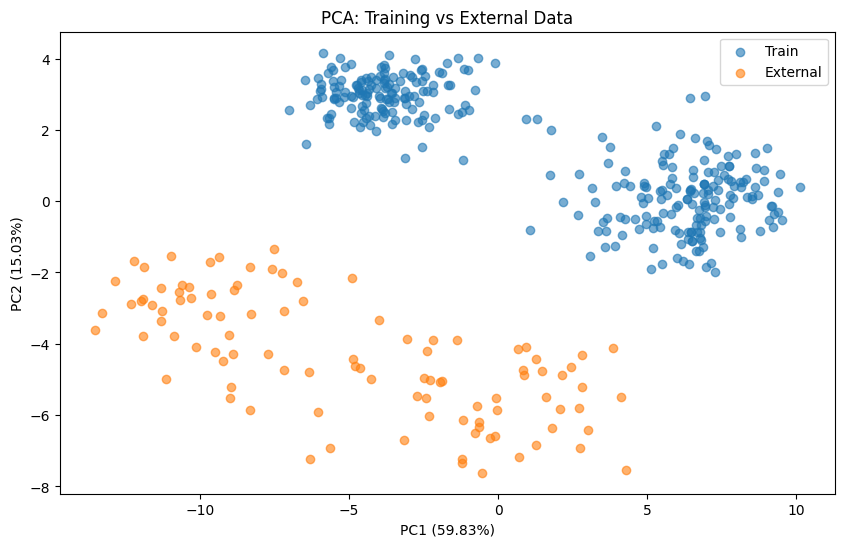

Training data stats:
Mean: -0.000, Std: 1.000
Min: -8.392, Max: 3.281

External data stats:
Mean: -0.708, Std: 1.507
Min: -6.664, Max: 3.246


In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Combine for PCA
X_combined = np.vstack([X_train_lasso, X_external_filtered])
labels = ['Train']*len(X_train_lasso) + ['External']*len(X_external_filtered)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

plt.figure(figsize=(10, 6))
for label in ['Train', 'External']:
    mask = np.array(labels) == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=label, alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.legend()
plt.title('PCA: Training vs External Data')
plt.savefig("../Results/ML_results/pca_train_external.png", dpi=600, bbox_inches="tight", facecolor="white")
plt.show()

# Check feature statistics
print("Training data stats:")
print(f"Mean: {X_train_lasso.mean():.3f}, Std: {X_train_lasso.std():.3f}")
print(f"Min: {X_train_lasso.min():.3f}, Max: {X_train_lasso.max():.3f}")

print("\nExternal data stats:")
print(f"Mean: {X_external_filtered.mean():.3f}, Std: {X_external_filtered.std():.3f}")
print(f"Min: {X_external_filtered.min():.3f}, Max: {X_external_filtered.max():.3f}")

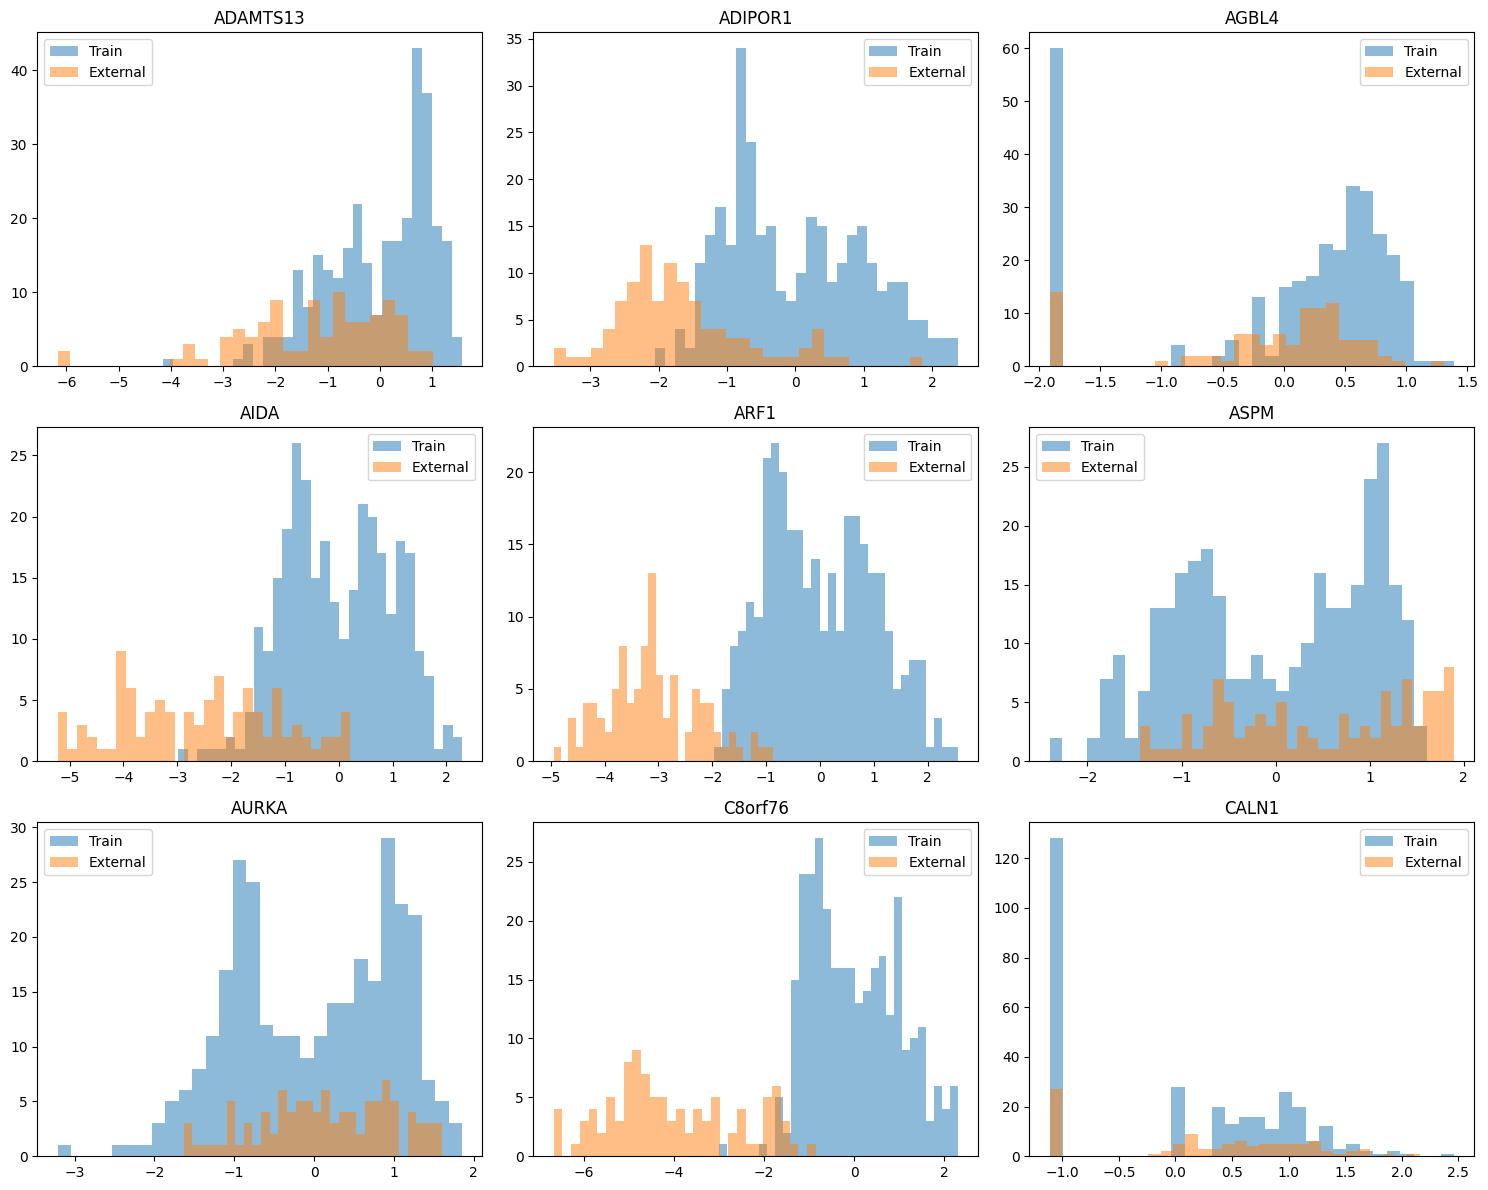

In [54]:
# Get selected gene names
selected_gene_names = X_train.columns[selected_features]

# Compare distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, gene in enumerate(selected_gene_names[:9]):  # First 9 genes
    gene_idx = list(selected_gene_names).index(gene)
    
    axes[idx].hist(X_train_lasso[:, gene_idx], bins=30, alpha=0.5, label='Train')
    axes[idx].hist(X_external_filtered[:, gene_idx], bins=30, alpha=0.5, label='External')
    axes[idx].set_title(gene)
    axes[idx].legend()

plt.tight_layout()
plt.show()

External predictions distribution:
1    53
0    48
Name: count, dtype: int64

Prediction probabilities:
Class 0 (Adjacent) mean probability: 0.548
Class 1 (HCC) mean probability: 0.452


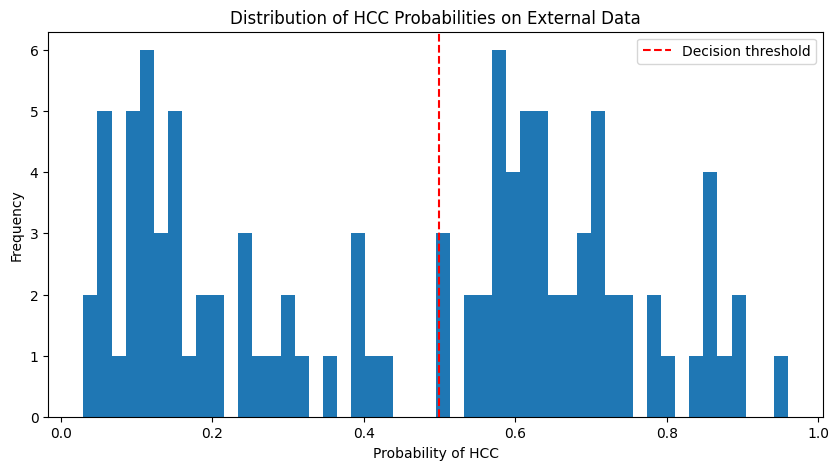

In [55]:
# Your prediction shows model ALWAYS predicts class 1 (HCC)
# Check class distribution in predictions
print("External predictions distribution:")
print(pd.Series(y_external_pred).value_counts())

# This suggests either:
# 1. Severe threshold issue
# 2. All samples appear as HCC to the model

# Check prediction probabilities
y_external_proba = best_rf.predict_proba(X_external_filtered)
print("\nPrediction probabilities:")
print(f"Class 0 (Adjacent) mean probability: {y_external_proba[:, 0].mean():.3f}")
print(f"Class 1 (HCC) mean probability: {y_external_proba[:, 1].mean():.3f}")

# Plot probability distribution
plt.figure(figsize=(10, 5))
plt.hist(y_external_proba[:, 1], bins=50)
plt.xlabel('Probability of HCC')
plt.ylabel('Frequency')
plt.title('Distribution of HCC Probabilities on External Data')
plt.axvline(0.5, color='r', linestyle='--', label='Decision threshold')
plt.legend()
plt.show()

In [56]:
X_external_log2.min().min(), X_external_log2.max().max()


(np.float64(-9.965784284662087), np.float64(3.9430667986442374))

In [57]:
# Check what the scaler was actually fitted on
print("Scaler statistics (what it learned):")
print(f"Mean shape: {scaler.mean_.shape}")
print(f"Mean sample values: {scaler.mean_[:5]}")
print(f"Scale sample values: {scaler.scale_[:5]}")

# Compare with training data
print("\nX_train statistics (before SMOTE):")
print(f"Shape: {X_train.shape}")
print(f"Mean sample: {X_train.mean(axis=0)[:5].values}")
print(f"Std sample: {X_train.std(axis=0)[:5].values}")

# And SMOTE data
print("\nX_train_balanced statistics (after SMOTE):")
print(f"Shape: {X_train_balanced.shape}")
print(f"Mean sample: {X_train_balanced.mean(axis=0)[:5]}")
print(f"Std sample: {X_train_balanced.std(axis=0)[:5]}")

# And External data
print("\nX_external_filtered statistics:")
print(f"Shape: {X_external_filtered.shape}")
print(f"Mean sample: {X_external_filtered.mean(axis=0)[:5]}")
print(f"Std sample: {X_external_filtered.std(axis=0)[:5]}")

Scaler statistics (what it learned):
Mean shape: (16447,)
Mean sample values: [ 3.05588064  2.61832671  2.12575338  3.09827563 -5.23640663]
Scale sample values: [0.38850883 0.45238243 0.63188236 0.26381737 3.40919333]

X_train statistics (before SMOTE):
Shape: (311, 16447)
Mean sample: [ 3.05588064  2.61832671  2.12575338  3.09827563 -5.23640663]
Std sample: [0.38913496 0.45311149 0.6329007  0.26424254 3.4146876 ]

X_train_balanced statistics (after SMOTE):
Shape: (338, 45)
Mean sample: [ 0.06640381 -0.06678463  0.05085365 -0.06427883 -0.06586835]
Std sample: [0.98798512 0.99361151 0.97649661 0.99709694 0.99352819]

X_external_filtered statistics:
Shape: (101, 45)
Mean sample: [-1.23852093 -1.66878363 -0.12896176 -2.54989473 -3.11209068]
Std sample: [1.37829341 0.96307941 0.81807414 1.43546488 0.85577336]
